In [1]:
# import main library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [3]:
df_test=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-dmitrij-badzjun-gr-69da5/my_final_project/Проект_3_users_test.csv', sep=';')

In [4]:
df_control1=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-dmitrij-badzjun-gr-69da5/my_final_project/Проект_3_users_control_1.csv', sep=';')

In [5]:
df_control2=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-dmitrij-badzjun-gr-69da5/my_final_project/Проект_3_users_control_2.csv', sep=';')

In [6]:
df_transactions_control1=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-dmitrij-badzjun-gr-69da5/my_final_project/Проект_3_transactions_control_1.csv', sep=';')

In [7]:
df_transactions_control2=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-dmitrij-badzjun-gr-69da5/my_final_project/Проект_3_transactions_control_2.csv', sep=';')

In [8]:
df_transactions_test=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-dmitrij-badzjun-gr-69da5/my_final_project/Проект_3_transactions_test.csv', sep=';')

In [9]:
#Начнем с создания одной единий таблицы
#Для этого в каждом фрейме пропишем к группе пользователи данного фрейма относятся

In [10]:
df_test['group']= 'test'
df_control1['group']= 'control1'
df_control2['group']= 'control2'
df_transactions_control1['group']= 'control1'
df_transactions_control2['group']= 'control2'
df_transactions_test['group']= 'test'

In [11]:
df_users=pd.concat([df_test,df_control1,df_control2], ignore_index=True)

In [12]:
df_payments=pd.concat([df_transactions_test,df_transactions_control1,df_transactions_control2], ignore_index=True)

In [13]:
df_final=df_users.merge(df_payments,how='left',on='uid')
df_final

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,...,total_revenue,group_x,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type,group_y
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,...,0,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,...,0,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,...,0,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,...,0,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,...,0,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359,891937401,63,242,NaN,Italy,"1,2",1,50,66,33,...,0,control2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13360,891692844,35,500,NaN,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,...,0,control2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13361,891096429,41,333,NaN,United States of America,NaN,1,38,44,6,...,0,control2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13362,891697584,48,210,NaN,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,...,0,control2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_final=df_final[['uid','age','attraction_coeff','coins','country_x','visit_days','gender','age_filter_start','age_filter_end','views_count','was_premium','is_premium','total_revenue','joined_at','paid_at','revenue','payment_id','from_page','product_type','group_x']]

In [15]:
df_final.isna().sum()

uid                     0
age                     0
attraction_coeff        0
coins               12830
country_x               0
visit_days           4020
gender                  0
age_filter_start        0
age_filter_end          0
views_count             0
was_premium         11678
is_premium          12440
total_revenue           0
joined_at           12386
paid_at             12386
revenue             12386
payment_id          12386
from_page           12386
product_type        12386
group_x                 0
dtype: int64

In [16]:
df_final.coins=df_final.coins.fillna(0)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df_final.visit_days=df_final.visit_days.fillna(0)

In [18]:
df_final.was_premium=df_final.was_premium.fillna(0)


In [19]:
df_final.is_premium=df_final.is_premium.fillna(0)

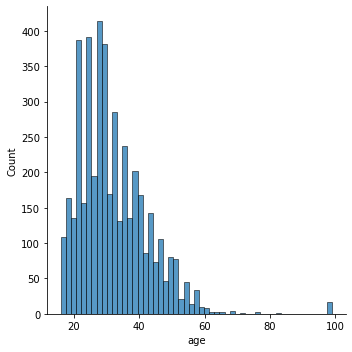

In [20]:
sns.displot(df_final[df_final['group_x']=='test'].age)

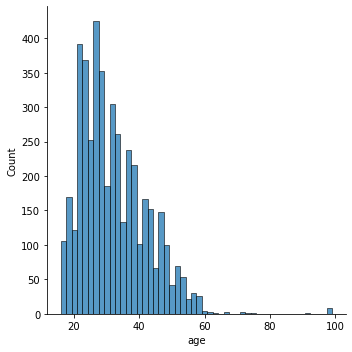

In [21]:
sns.displot(df_final[df_final['group_x']=='control1'].age)

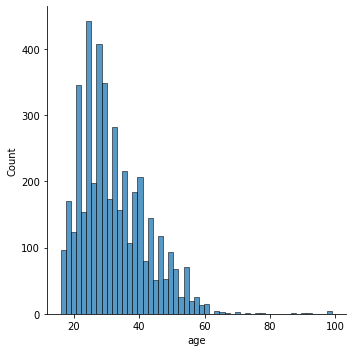

In [22]:
sns.displot(df_final[df_final['group_x']=='control2'].age)

In [23]:
#Проверка распределения категориальных данных (gender) при помощи хи-квадрат

In [24]:
count_gender_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')].groupby(['group_x','gender'])['uid'].count().unstack()
count_gender_test_control1

gender,0,1
group_x,,
control1,182,4342
test,202,4233


In [25]:
scipy.stats.chi2_contingency(count_gender_test_control1)

(1.4163383225350283,
 0.23400703868243483,
 1,
 array([[ 193.90735573, 4330.09264427],
        [ 190.09264427, 4244.90735573]]))

In [26]:
count_gender_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')].groupby(['group_x','gender'])['uid'].count().unstack()
count_gender_test_control2

gender,0,1
group_x,,
control2,195,4210
test,202,4233


In [27]:
scipy.stats.chi2_contingency(count_gender_test_control2)

(0.057092999444440254,
 0.811151011556867,
 1,
 array([[ 197.82635747, 4207.17364253],
        [ 199.17364253, 4235.82635747]]))

In [28]:
#Проверим, что выборки по распределению age не различаются
#Для проведения t-test и выбора его вида, проверим дисперсии на полигамность при помощи теста Левена

In [29]:
scipy.stats.levene(df_final[df_final['group_x']=='test']['age'],df_final[df_final['group_x']=='control1']['age'])

LeveneResult(statistic=0.0070621916004628285, pvalue=0.9330290139916695)

In [30]:
scipy.stats.levene(df_final[df_final['group_x']=='test']['age'],df_final[df_final['group_x']=='control2']['age'])

LeveneResult(statistic=0.017596431670191707, pvalue=0.8944719875862395)

In [31]:
#Проверили полигамность дисперсий, исходя из графиков распределения графиков по группам,
#данные скучены в левой части из-за выбросов, чтобы избавиться от этого можем прологарифмировать данные age

In [32]:
df_age_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')][['uid','age','group_x']]

In [33]:
df_age_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')][['uid','age','group_x']]

In [34]:
#Хоть и распределение ненормальное, используем ттест, ненормальность компенсируется размером выборки

In [35]:
scipy.stats.ttest_ind(df_age_test_control1[df_age_test_control1['group_x']=='test'].age,df_age_test_control1[df_age_test_control1['group_x']=='control1'].age)

Ttest_indResult(statistic=0.04504788454765446, pvalue=0.9640701455323597)

In [36]:
scipy.stats.ttest_ind(df_age_test_control2[df_age_test_control2['group_x']=='test'].age,df_age_test_control2[df_age_test_control2['group_x']=='control2'].age)

Ttest_indResult(statistic=-0.621940339775622, pvalue=0.5339971414687767)

In [37]:
#Наличие стат. значимых различий в данных о возрасте не доказано

In [38]:
#Разберем распределение переменной coins в test и control1,control2
#Также предположим, что пользователя имеющешо NaN одновременно в колонке coins и visit_days, считается "нулевым" и нам при тесте
#не интересен, так как с нашим продуктом никак не взаимодействовал

In [39]:
df_coins_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')]
df_coins_test_control2=df_coins_test_control2[~((df_coins_test_control2['coins'] == 0) & (df_coins_test_control2['visit_days'] == 0))][['uid','coins','group_x']]
df_coins_test_control2=df_coins_test_control2.drop_duplicates(subset='uid')

In [40]:
df_coins_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')]
df_coins_test_control1=df_coins_test_control1[~((df_coins_test_control1['coins'] == 0) & (df_coins_test_control1['visit_days'] == 0))][['uid','coins','group_x']]
df_coins_test_control1=df_coins_test_control1.drop_duplicates(subset='uid')

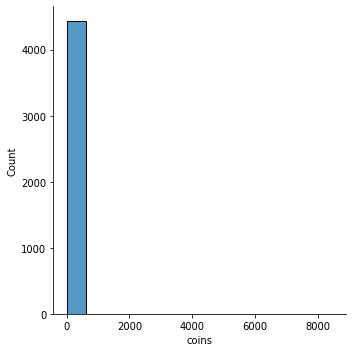

In [41]:
sns.displot(df_final[df_final['group_x']=='test'].coins)

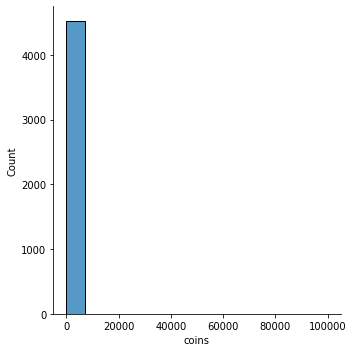

In [42]:
sns.displot(df_final[df_final['group_x']=='control1'].coins)

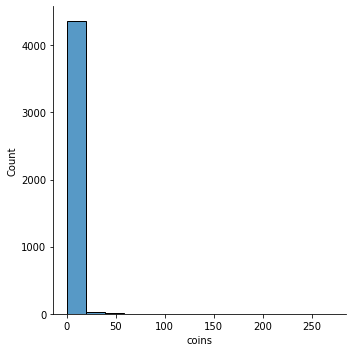

In [43]:
sns.displot(df_final[df_final['group_x']=='control2'].coins)

In [44]:
#Так как мы видем, что распределение ненормальное, так как в группах в переменных преобладает ноль, поэтому для подтверждения 
#корректности работы системы сплитования можем снова использовать хи-квадрат, разделив данные флагом на coins<0 и coins>0

In [45]:
df_coins_test_control1['not_is_null']=df_coins_test_control1['coins']>0
df_coins_test_control1['not_is_null']=df_coins_test_control1.not_is_null.apply(lambda x: 1 if x==True else 0)
df_coins_test_control1.not_is_null.sum()

109

In [46]:
df_coins_test_control2['not_is_null']=df_coins_test_control2['coins']>0
df_coins_test_control2['not_is_null']=df_coins_test_control2.not_is_null.apply(lambda x: 1 if x==True else 0)

In [47]:
coins_null_test_control1=df_coins_test_control1.groupby(['group_x','not_is_null']).size().unstack(fill_value=0)

In [48]:
coins_null_test_control1

not_is_null,0,1
group_x,,
control1,2959,60
test,2930,49


In [49]:
coins_null_test_control2=df_coins_test_control2.groupby(['group_x','not_is_null']).size().unstack(fill_value=0)

In [50]:
coins_null_test_control2

not_is_null,0,1
group_x,,
control2,2840,61
test,2930,49


In [51]:
scipy.stats.chi2_contingency(coins_null_test_control1)

(0.8035386492599902,
 0.3700374730669552,
 1,
 array([[2964.13654552,   54.86345448],
        [2924.86345448,   54.13654552]]))

In [52]:
scipy.stats.chi2_contingency(coins_null_test_control2)

(1.4383495210633024,
 0.23040661062203105,
 1,
 array([[2846.72959184,   54.27040816],
        [2923.27040816,   55.72959184]]))

In [53]:
#Проверим систему сплитования относительно переменной attraction_coeff по группам

In [54]:
df_atcf_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')][['uid','attraction_coeff','group_x']]
df_atcf_test_control1=df_atcf_test_control1.drop_duplicates(subset='uid')

In [55]:
df_atcf_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')][['uid','attraction_coeff','group_x']]
df_atcf_test_control2=df_atcf_test_control2.drop_duplicates(subset='uid')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


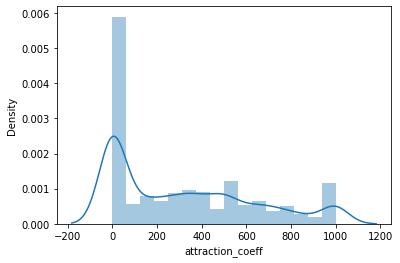

In [56]:
sns.distplot(df_atcf_test_control2[df_atcf_test_control2['group_x']=='test'].attraction_coeff)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


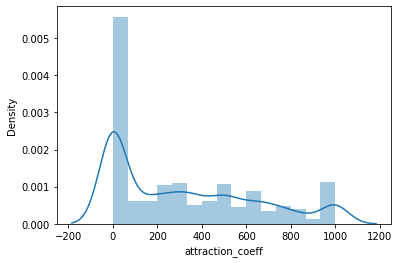

In [57]:
sns.distplot(df_atcf_test_control2[df_atcf_test_control2['group_x']=='control2'].attraction_coeff)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


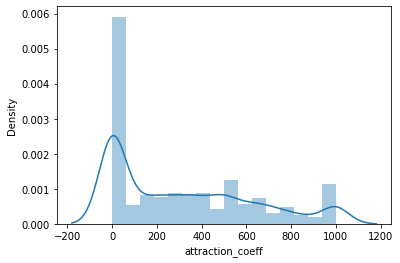

In [58]:
sns.distplot(df_atcf_test_control1[df_atcf_test_control1['group_x']=='control1'].attraction_coeff)

In [59]:
#Исходя из графика, видим что присутствуют отрицательные значения и значения больше 1000, что некорректно, так как колл-во лайков или просмотров 
#не может принимать отрицательные значения,а также не может быть больше 1000, также предлагаю избавиться от нулевых значений, которые создают огромный "хвост"
#в распредление переменной, и провести проверку распределения переменной по группам исходя только из attraction_coeff>0 & attraction_coeff<=1000

In [60]:
df_atcf_test_control2=df_atcf_test_control2[(df_atcf_test_control2.attraction_coeff>0)&(df_atcf_test_control2.attraction_coeff<=1000)]

In [61]:
df_atcf_test_control1=df_atcf_test_control1[(df_atcf_test_control1.attraction_coeff>0)&df_atcf_test_control1.attraction_coeff<=1000]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


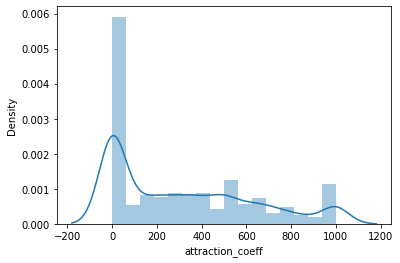

In [62]:
sns.distplot(df_atcf_test_control1[df_atcf_test_control1['group_x']=='control1'].attraction_coeff)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


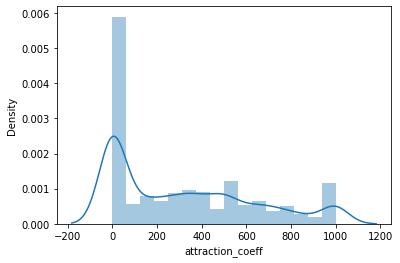

In [63]:
sns.distplot(df_atcf_test_control1[df_atcf_test_control1['group_x']=='test'].attraction_coeff)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


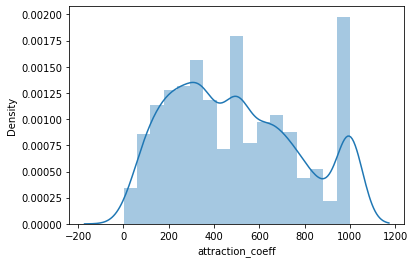

In [64]:
sns.distplot(df_atcf_test_control2[df_atcf_test_control2['group_x']=='control2'].attraction_coeff)

In [65]:
#Проведем два теста для проверки стат. значимых различий, U-тест, которые работает, не смотря на ненормальность данных, и T-тест


In [66]:
scipy.stats.mannwhitneyu(df_atcf_test_control1[df_atcf_test_control1['group_x']=='control1'].attraction_coeff,df_atcf_test_control1[df_atcf_test_control1['group_x']=='test'].attraction_coeff)

MannwhitneyuResult(statistic=9294479.5, pvalue=0.6352175892456173)

In [67]:
scipy.stats.mannwhitneyu(df_atcf_test_control2[df_atcf_test_control2['group_x']=='control2'].attraction_coeff,df_atcf_test_control2[df_atcf_test_control2['group_x']=='test'].attraction_coeff)

MannwhitneyuResult(statistic=3922671.5, pvalue=0.25932719233557466)

In [68]:
scipy.stats.ttest_ind(df_atcf_test_control1[df_atcf_test_control1['group_x']=='control1'].attraction_coeff,df_atcf_test_control1[df_atcf_test_control1['group_x']=='test'].attraction_coeff)

Ttest_indResult(statistic=-0.6296108950870088, pvalue=0.5289658300229096)

In [69]:
scipy.stats.ttest_ind(df_atcf_test_control2[df_atcf_test_control2['group_x']=='control2'].attraction_coeff,df_atcf_test_control2[df_atcf_test_control2['group_x']=='test'].attraction_coeff)

Ttest_indResult(statistic=1.1502339414786271, pvalue=0.25009707040587253)

In [70]:
#Исходя из проведенных тестов, стат. значимых различий не выявлено, следовательно переменная по группам была правильно распределена

In [71]:
#С проверкой системы сплитования закончим и перейдем к результатам AB теста, проверим изменение метрик и значимы ли эти изменения
#Для начала отчистим исходный датафрейм от ненужных данных, избавимся от uid, у которвых coins=0 & visit_days=0,
#так как данные пользователи не взаимодействовали с нашим продуктом, избавимся от аномалий в attraction_coeff, чтобы его значения,
# были в отрезке (0;1000) и будем работать только с уникальными uid

In [72]:
df_final = df_final[
    ~((df_final['coins'] == 0) & (df_final['visit_days'] == 0)) &
    (df_final['attraction_coeff'] >= 0) &
    (df_final['attraction_coeff'] <= 1000)
]

In [73]:
#Переведем переменные joined_at и paid_at к типу datetime

In [74]:
df_final.joined_at=pd.to_datetime(df_final.joined_at)
df_final.paid_at=pd.to_datetime(df_final.paid_at)

In [75]:
df_final.dtypes

uid                          int64
age                          int64
attraction_coeff             int64
coins                      float64
country_x                   object
visit_days                  object
gender                       int64
age_filter_start             int64
age_filter_end               int64
views_count                  int64
was_premium                float64
is_premium                 float64
total_revenue                int64
joined_at           datetime64[ns]
paid_at             datetime64[ns]
revenue                    float64
payment_id                 float64
from_page                   object
product_type                object
group_x                     object
dtype: object

In [76]:
df_final.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins                  0
country_x              0
visit_days             0
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium            0
is_premium             0
total_revenue          0
joined_at           8422
paid_at             8422
revenue             8422
payment_id          8422
from_page           8422
product_type        8422
group_x                0
dtype: int64

In [77]:
#Избавимся от аномалий, в которых время оплаты происходило раньше, чем время регистрации

In [78]:
df_final = df_final[(df_final['paid_at'].isna()) | (df_final['paid_at'] >= df_final['joined_at'])]

In [79]:
df_final

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,group_x
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
5,891083133,24,0,0.0,Spain,1,1,16,27,0,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
8,891085770,28,0,0.0,Italy,"1,2,3,4",1,25,31,1,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,891094593,55,222,0.0,United States of America,"1,2,3,4,5,6",1,28,38,117,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13358,891095106,22,625,0.0,United Arab Emirates,"1,2,3,4,5",1,19,25,8,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13359,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13360,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2


In [80]:
#Удалим также пользователей, у которых есть премиум или когда-то был, но нет информации о тразакции

In [81]:
mask_error = (
    ((df_final['is_premium'] == 1) | (df_final['was_premium'] == 1))
    & df_final['joined_at'].isna()
)
df_final = df_final[~mask_error]

In [82]:
df_final

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,group_x
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
5,891083133,24,0,0.0,Spain,1,1,16,27,0,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
8,891085770,28,0,0.0,Italy,"1,2,3,4",1,25,31,1,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,891094593,55,222,0.0,United States of America,"1,2,3,4,5,6",1,28,38,117,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13358,891095106,22,625,0.0,United Arab Emirates,"1,2,3,4,5",1,19,25,8,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13359,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13360,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2


In [83]:
df_no_nan = df_final.dropna(subset=['uid', 'payment_id'])
df_no_nan = df_no_nan.drop_duplicates(subset=['uid', 'payment_id'], keep='first')
df_final = pd.concat([df_no_nan, df_final[df_final['payment_id'].isna()]])

In [84]:
df_final

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,group_x
20,891152790,29,769,0.0,Spain,"2,5,6",1,16,32,13,1.0,1.0,12597,2017-08-11 18:39:00,2017-10-11 11:29:00,12597.0,147.0,dating,premium_no_trial,test
35,892333656,50,436,4.0,United States of America,"1,2,3,4",1,47,53,126,0.0,0.0,897,2017-10-16 01:45:00,2017-10-16 01:49:00,897.0,146.0,empty_likes,coins,test
46,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,popular_users_chat,premium_no_trial,test
48,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 14:21:00,6305.0,19.0,empty_likes,coins,test
104,891343671,26,0,24.0,France,"1,2,3,4,5,6,7,8,9",1,23,35,37,1.0,1.0,21580,2017-05-11 13:42:00,2017-05-11 14:02:00,2717.0,19.0,none,coins,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,891094593,55,222,0.0,United States of America,"1,2,3,4,5,6",1,28,38,117,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13358,891095106,22,625,0.0,United Arab Emirates,"1,2,3,4,5",1,19,25,8,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13359,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2
13360,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control2


In [85]:
df_final.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins                  0
country_x              0
visit_days             0
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium            0
is_premium             0
total_revenue          0
joined_at           7834
paid_at             7834
revenue             7834
payment_id          7834
from_page           7834
product_type        7834
group_x                0
dtype: int64

In [86]:
#Возьмем метрику Conversion Rate, чтобы оценить как изменилась конвертация пользователя обычного в пользователя с премиум-подпиской

In [87]:
cr_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')]

In [88]:
cr_test_control1

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,group_x
20,891152790,29,769,0.0,Spain,"2,5,6",1,16,32,13,1.0,1.0,12597,2017-08-11 18:39:00,2017-10-11 11:29:00,12597.0,147.0,dating,premium_no_trial,test
35,892333656,50,436,4.0,United States of America,"1,2,3,4",1,47,53,126,0.0,0.0,897,2017-10-16 01:45:00,2017-10-16 01:49:00,897.0,146.0,empty_likes,coins,test
46,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,popular_users_chat,premium_no_trial,test
48,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 14:21:00,6305.0,19.0,empty_likes,coins,test
104,891343671,26,0,24.0,France,"1,2,3,4,5,6,7,8,9",1,23,35,37,1.0,1.0,21580,2017-05-11 13:42:00,2017-05-11 14:02:00,2717.0,19.0,none,coins,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,891187155,24,250,0.0,Chile,"1,2,3,4,5,6,7,8",1,21,27,4,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1
8955,891905022,38,200,0.0,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1
8956,891304722,49,411,0.0,United States of America,1,1,46,52,17,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1
8957,891302328,27,0,0.0,United States of America,"1,3,5",1,24,30,0,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1


In [89]:
#Разберем страны, которые встречаются только в отдельных группах и будем работать с метрикой без их учета

In [90]:
test_countries = set(cr_test_control1[cr_test_control1['group_x'] == 'test']['country_x'].unique())
control_countries = set(cr_test_control1[cr_test_control1['group_x'] == 'control1']['country_x'].unique())

only_in_test = test_countries - control_countries
only_in_control = control_countries - test_countries

print("Только в тесте:", only_in_test)
print("Только в контроле:", only_in_control)

Только в тесте: {'Monaco', 'Indonesia', 'Singapore', 'Pakistan', 'Nepal', 'Tajikistan', 'Uzbekistan', 'Latvia', 'Morocco', 'Hungary', 'Islamic Republic of Iran', 'Iraq', 'Guatemala'}
Только в контроле: {'China', 'Armenia', 'Panama', 'Moldova, Republic of', 'Puerto Rico', 'Burkina Faso', 'Sweden', 'Jamaica', 'Qatar', 'Venezuela'}


In [91]:
common_countries = test_countries & control_countries
cr_test_control1 = cr_test_control1[cr_test_control1['country_x'].isin(common_countries)]

In [92]:
cr_test_control1

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,group_x
20,891152790,29,769,0.0,Spain,"2,5,6",1,16,32,13,1.0,1.0,12597,2017-08-11 18:39:00,2017-10-11 11:29:00,12597.0,147.0,dating,premium_no_trial,test
35,892333656,50,436,4.0,United States of America,"1,2,3,4",1,47,53,126,0.0,0.0,897,2017-10-16 01:45:00,2017-10-16 01:49:00,897.0,146.0,empty_likes,coins,test
46,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,popular_users_chat,premium_no_trial,test
48,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 14:21:00,6305.0,19.0,empty_likes,coins,test
104,891343671,26,0,24.0,France,"1,2,3,4,5,6,7,8,9",1,23,35,37,1.0,1.0,21580,2017-05-11 13:42:00,2017-05-11 14:02:00,2717.0,19.0,none,coins,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,891187155,24,250,0.0,Chile,"1,2,3,4,5,6,7,8",1,21,27,4,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1
8955,891905022,38,200,0.0,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1
8956,891304722,49,411,0.0,United States of America,1,1,46,52,17,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1
8957,891302328,27,0,0.0,United States of America,"1,3,5",1,24,30,0,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,NaN,control1


In [93]:
#Для расчета CR будем брать только уникальные uid пользователей

In [94]:
cr_test_control1=cr_test_control1.drop_duplicates(subset=['uid'])

In [95]:
#Разберемся с системами платежей, через которые проводились тразакции.

In [96]:
cr_test_control1[cr_test_control1['group_x'] == 'test'].payment_id.value_counts()

147.0    67
19.0     18
146.0    17
68.0      9
67.0      4
Name: payment_id, dtype: int64

In [97]:
cr_test_control1[cr_test_control1['group_x'] == 'control1'].payment_id.value_counts()

147.0    90
19.0     25
146.0    15
68.0     11
67.0     11
0.0       2
127.0     1
Name: payment_id, dtype: int64

In [98]:
#Оставляем только 147 и 19

In [99]:
buyers=cr_test_control1[(cr_test_control1['payment_id']==147)|(cr_test_control1['payment_id']==19)]

In [100]:
#Наш эксперимент наблюдал над пользователями, которые покупают премиум без trial, 
#выбирает в типе покупаемого продукта premium_no_trial

In [101]:
buyers=buyers[buyers['product_type']=='premium_no_trial']


In [102]:
buyers=buyers.groupby('group_x',as_index=False)['uid'].count()
buyers.rename(columns={'uid':'count_buy'},inplace=True)

In [103]:
buyers

,group_x,count_buy
0,control1,49
1,test,36


In [104]:
group_count=cr_test_control1.groupby('group_x',as_index=False)['uid'].count()


In [105]:
group_count.rename(columns={'uid':'count_uid'},inplace=True)

In [106]:
chi_cr1=group_count.merge(buyers,how='left',on='group_x')

In [107]:
chi_cr1=chi_cr1[['count_buy','count_uid']]
chi_cr1

,count_buy,count_uid
0,49,2792
1,36,2736


In [108]:
#В переменной buyers у нас пользователи, совершившие целевое действие,
#а в group_count число пользователей в отдельной группе

In [109]:
scipy.stats.chi2_contingency(chi_cr1)

(1.4338599778659857,
 0.2311355196477452,
 1,
 array([[  43.02244789, 2797.97755211],
        [  41.97755211, 2730.02244789]]))

In [110]:
#Хоть конверсия и упала, но стат.значимых различий не было обнаружено в процессе проведения теста.

In [111]:
cr_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')]
test_countries2 = set(cr_test_control2[cr_test_control2['group_x'] == 'test']['country_x'].unique())
control_countries2 = set(cr_test_control2[cr_test_control2['group_x'] == 'control2']['country_x'].unique())

only_in_test2 = test_countries2 - control_countries2
only_in_control2 = control_countries2 - test_countries2

print("Только в тесте:", only_in_test2)
print("Только в контроле:", only_in_control2)

Только в тесте: {'Monaco', 'Algeria', 'Indonesia', 'Singapore', 'Nepal', 'Tunisia', 'Uzbekistan', 'Latvia', 'Egypt', 'Islamic Republic of Iran', 'Iraq', 'Guatemala', 'Romania'}
Только в контроле: {'Somalia', 'Malaysia', 'Mali', 'Georgia', 'Uganda', 'China', 'Uruguay', 'Belarus', 'New Zealand', 'Nicaragua', 'Qatar', 'Paraguay', 'Czech Republic', 'Kuwait'}


In [112]:
common_countries2 = test_countries2 & control_countries2
cr_test_control2 = cr_test_control2[cr_test_control2['country_x'].isin(common_countries)]

In [113]:
buyers_2=cr_test_control2[(cr_test_control2['payment_id']==147)|(cr_test_control2['payment_id']==19)]

In [114]:
buyers_2=cr_test_control2[cr_test_control2['product_type']=='premium_no_trial']

In [115]:
buyers_2=buyers_2.groupby('group_x',as_index=False)['uid'].count()
buyers_2.rename(columns={'uid':'count_buy'},inplace=True)

In [116]:
group_count_2=cr_test_control2.groupby('group_x',as_index=False)['uid'].count()

In [117]:
group_count_2.rename(columns={'uid':'count_uid'},inplace=True)
chi_cr2=group_count_2.merge(buyers_2,how='left',on='group_x')
chi_cr2=chi_cr2[['count_buy','count_uid']]

In [118]:
chi_cr2

,count_buy,count_uid
0,85,2728
1,57,2790


In [119]:
scipy.stats.chi2_contingency(chi_cr2)

(5.604103285926065,
 0.017918463108736352,
 1,
 array([[  70.57349823, 2742.42650177],
        [  71.42650177, 2775.57349823]]))

In [120]:
#В случае с control2, видим, что обнаружено стат.значимое различие, найдем какое он
#CR_test=57/2790 =0.02 и CR_control2=85/2728=0.03
#((0,02-0,03)/0,03)*100= -33,(3)%
#Наш CR упал примерно на 33% , что довольно значимо.

In [121]:
#Расчитаем ARPU

In [122]:
arpu_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')]
arpu_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')]

In [123]:
#Проведем нужные фильтрации

In [124]:
test_countries_arpu1 = set(arpu_test_control1[arpu_test_control1['group_x'] == 'test']['country_x'].unique())
control_countries_arpu1 = set(arpu_test_control1[arpu_test_control1['group_x'] == 'control1']['country_x'].unique())

only_in_test_arpu1 = test_countries_arpu1 - control_countries_arpu1
only_in_control_arpu1 = control_countries_arpu1 - test_countries_arpu1

print("Только в тесте:", only_in_test_arpu1)
print("Только в контроле:", only_in_control_arpu1)
common_countries_arpu1 = test_countries_arpu1 & control_countries_arpu1
arpu_test_control1 = arpu_test_control1[arpu_test_control1['country_x'].isin(common_countries_arpu1)]

Только в тесте: {'Monaco', 'Indonesia', 'Singapore', 'Pakistan', 'Nepal', 'Tajikistan', 'Uzbekistan', 'Latvia', 'Morocco', 'Hungary', 'Islamic Republic of Iran', 'Iraq', 'Guatemala'}
Только в контроле: {'China', 'Armenia', 'Panama', 'Moldova, Republic of', 'Puerto Rico', 'Burkina Faso', 'Sweden', 'Jamaica', 'Qatar', 'Venezuela'}


In [125]:
buyers_arpu1=arpu_test_control1[(arpu_test_control1['product_type']=='premium_no_trial') & ((arpu_test_control1['payment_id']==147)|(arpu_test_control1['payment_id']==19)) ]

In [126]:
arpu_test_control1=arpu_test_control1.merge(buyers_arpu1,how='left',on='uid')

In [127]:
arpu_test_control1=arpu_test_control1[['uid','was_premium_x','is_premium_x','total_revenue_x','joined_at_y','paid_at_y','revenue_y','payment_id_y','product_type_y','group_x_x']]

In [128]:
test_countries_arpu2 = set(arpu_test_control2[arpu_test_control2['group_x'] == 'test']['country_x'].unique())
control_countries_arpu2 = set(arpu_test_control2[arpu_test_control2['group_x'] == 'control2']['country_x'].unique())

only_in_test_arpu2 = test_countries_arpu2 - control_countries_arpu2
only_in_control_arpu2 = control_countries_arpu2 - test_countries_arpu2

print("Только в тесте:", only_in_test_arpu2)
print("Только в контроле:", only_in_control_arpu2)
common_countries_arpu2 = test_countries_arpu2 & control_countries_arpu2
arpu_test_control2 = arpu_test_control2[arpu_test_control2['country_x'].isin(common_countries_arpu2)]
buyers_arpu2=arpu_test_control2[(arpu_test_control2['product_type']=='premium_no_trial') & ((arpu_test_control2['payment_id']==147)|(arpu_test_control2['payment_id']==19)) ]
arpu_test_control2=arpu_test_control2.merge(buyers_arpu2,how='left',on='uid')

Только в тесте: {'Monaco', 'Algeria', 'Indonesia', 'Singapore', 'Nepal', 'Tunisia', 'Uzbekistan', 'Latvia', 'Egypt', 'Islamic Republic of Iran', 'Iraq', 'Guatemala', 'Romania'}
Только в контроле: {'Somalia', 'Malaysia', 'Mali', 'Georgia', 'Uganda', 'China', 'Uruguay', 'Belarus', 'New Zealand', 'Nicaragua', 'Qatar', 'Paraguay', 'Czech Republic', 'Kuwait'}


In [129]:
arpu_test_control2

,uid,age_x,attraction_coeff_x,coins_x,country_x_x,visit_days_x,gender_x,age_filter_start_x,age_filter_end_x,views_count_x,...,was_premium_y,is_premium_y,total_revenue_y,joined_at_y,paid_at_y,revenue_y,payment_id_y,from_page_y,product_type_y,group_x_y
0,891152790,29,769,0.0,Spain,"2,5,6",1,16,32,13,...,1.0,1.0,12597.0,2017-08-11 18:39:00,2017-10-11 11:29:00,12597.0,147.0,dating,premium_no_trial,test
1,892333656,50,436,4.0,United States of America,"1,2,3,4",1,47,53,126,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,...,1.0,1.0,37817.0,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,popular_users_chat,premium_no_trial,test
3,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,...,1.0,1.0,37817.0,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,popular_users_chat,premium_no_trial,test
4,891343671,26,0,24.0,France,"1,2,3,4,5,6,7,8,9",1,23,35,37,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,891094593,55,222,0.0,United States of America,"1,2,3,4,5,6",1,28,38,117,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
5523,891095106,22,625,0.0,United Arab Emirates,"1,2,3,4,5",1,19,25,8,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
5524,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
5525,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [130]:
arpu_test_control2=arpu_test_control2[['uid','was_premium_x','is_premium_x','total_revenue_x','joined_at_y','paid_at_y','revenue_y','payment_id_y','product_type_y','group_x_x']]

In [131]:
arpu_test_control2

,uid,was_premium_x,is_premium_x,total_revenue_x,joined_at_y,paid_at_y,revenue_y,payment_id_y,product_type_y,group_x_x
0,891152790,1.0,1.0,12597,2017-08-11 18:39:00,2017-10-11 11:29:00,12597.0,147.0,premium_no_trial,test
1,892333656,0.0,0.0,897,NaT,NaT,NaN,NaN,NaN,test
2,891589239,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,premium_no_trial,test
3,891589239,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,premium_no_trial,test
4,891343671,1.0,1.0,21580,NaT,NaT,NaN,NaN,NaN,test
...,...,...,...,...,...,...,...,...,...,...
5522,891094593,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control2
5523,891095106,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control2
5524,891937401,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control2
5525,891692844,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control2


In [132]:
arpu_test_control1

,uid,was_premium_x,is_premium_x,total_revenue_x,joined_at_y,paid_at_y,revenue_y,payment_id_y,product_type_y,group_x_x
0,891152790,1.0,1.0,12597,2017-08-11 18:39:00,2017-10-11 11:29:00,12597.0,147.0,premium_no_trial,test
1,892333656,0.0,0.0,897,NaT,NaT,NaN,NaN,NaN,test
2,891589239,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,premium_no_trial,test
3,891589239,1.0,1.0,37817,2017-10-31 14:16:00,2017-10-31 16:07:00,12597.0,147.0,premium_no_trial,test
4,891343671,1.0,1.0,21580,NaT,NaT,NaN,NaN,NaN,test
...,...,...,...,...,...,...,...,...,...,...
5646,891187155,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control1
5647,891905022,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control1
5648,891304722,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control1
5649,891302328,0.0,0.0,0,NaT,NaT,NaN,NaN,NaN,control1


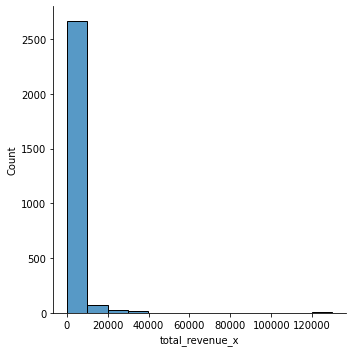

In [133]:
sns.displot(arpu_test_control1[arpu_test_control1['group_x_x']=='test'].total_revenue_x)

In [134]:
arpu_test_control1[arpu_test_control1['group_x_x']=='test'].total_revenue_x.describe()

count      2790.000000
mean       1343.994982
std        8262.693022
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      129870.000000
Name: total_revenue_x, dtype: float64

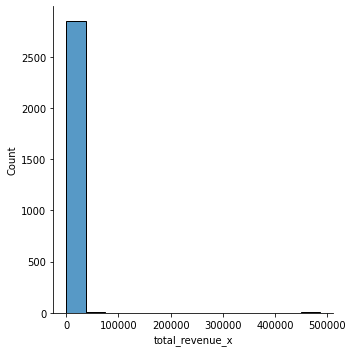

In [135]:
sns.displot(arpu_test_control1[arpu_test_control1['group_x_x']=='control1'].total_revenue_x)

In [136]:
arpu_test_control1[arpu_test_control1['group_x_x']=='control1'].total_revenue_x.describe()

count      2861.000000
mean       1687.914366
std       18738.337712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      486330.000000
Name: total_revenue_x, dtype: float64

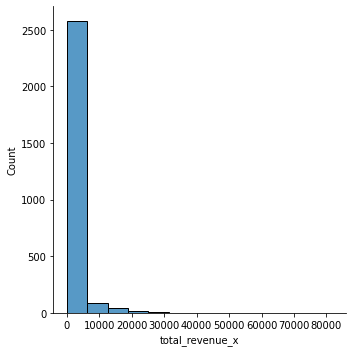

In [137]:
sns.displot(arpu_test_control2[arpu_test_control2['group_x_x']=='control2'].total_revenue_x)

In [138]:
arpu_test_control2[arpu_test_control2['group_x_x']=='control2'].total_revenue_x.describe()

count     2736.000000
mean       864.528509
std       4155.020167
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      81796.000000
Name: total_revenue_x, dtype: float64

In [139]:
arpu_test_control1=arpu_test_control1[['uid','total_revenue_x','group_x_x']]
arpu_test_control2=arpu_test_control2[['uid','total_revenue_x','group_x_x']]

In [140]:
#Исходя из графиков мы видели, что в распределении есть выбросы, поэтому при помощи перцентилей избавимся от них
#но потом вернем их и посмотрим как они влияют на тест

In [141]:
high_quant=np.quantile(arpu_test_control1.total_revenue_x,0.99)

In [142]:
arpu_101=arpu_test_control1[(arpu_test_control1['total_revenue_x']<=high_quant)]

In [143]:
arpu_101

,uid,total_revenue_x,group_x_x
0,891152790,12597,test
1,892333656,897,test
4,891343671,21580,test
5,891343671,21580,test
6,891343671,21580,test
...,...,...,...
5646,891187155,0,control1
5647,891905022,0,control1
5648,891304722,0,control1
5649,891302328,0,control1


In [211]:
#Так как распределение ненормально, а нам нужно сравнение средних, а Манна-Уитни сравнивает распределение выборок,
#воспользуемся пермутационным тестом

In [149]:
def bootstrap_test(data1, data2, n_bootstrap=100000):
    observed_diff = np.mean(data1) - np.mean(data2)
    combined = np.concatenate([data1, data2])
    diffs = []
    for _ in range(n_bootstrap):
        np.random.shuffle(combined)
        new_d1 = combined[:len(data1)]
        new_d2 = combined[len(data1):]
        diffs.append(np.mean(new_d1) - np.mean(new_d2))
    p_value = np.mean(np.abs(diffs) >= np.abs(observed_diff))
    return observed_diff, p_value

In [150]:
bootstrap_test(arpu_101[arpu_101['group_x_x']=='test'].total_revenue_x,arpu_101[arpu_101['group_x_x']=='control1'].total_revenue_x)

(-161.07413607911406, 0.0528)

In [151]:
#Видим, что присутствуют стат.значимые различия, посмотрим в какую сторону изменяется наш ARPU

In [152]:
arpu_test=arpu_101[arpu_101['group_x_x']=='test'].total_revenue_x.sum()/arpu_101[arpu_101['group_x_x']=='test'].uid.count()

In [153]:
arpu_control1=arpu_101[arpu_101['group_x_x']=='control1'].total_revenue_x.sum()/arpu_101[arpu_101['group_x_x']=='control1'].uid.count()

In [154]:
((arpu_test-arpu_control1)/arpu_control1)*100

-20.85156221755982

In [155]:
#Наш ARPU упал почти на 21%
#Теперь проведем тест, если бы мы не убирали выбросы

In [156]:
bootstrap_test(arpu_test_control1[arpu_test_control1['group_x_x']=='test'].total_revenue_x,arpu_test_control1[arpu_test_control1['group_x_x']=='control1'].total_revenue_x)

(-343.91938352757825, 0.39105)

In [157]:
#Как мы видим, не убрав выбросы в наших данных, мы бы потеряли стат.значимые различия в наших ARPU.
#Отрабатаем тем же образом с группами test и control2

In [158]:
high_quant2=np.quantile(arpu_test_control2.total_revenue_x,0.99)

In [160]:
arpu_102=arpu_test_control2[(arpu_test_control2['total_revenue_x']<=high_quant2)]

In [161]:
bootstrap_test(arpu_102[arpu_102['group_x_x']=='test'].total_revenue_x,arpu_102[arpu_102['group_x_x']=='control2'].total_revenue_x)

(-136.39854765673408, 0.07167)

In [162]:
#Стат.значимых различий не наблюдается
#Вернем в тест выбросы

In [163]:
bootstrap_test(arpu_test_control2[arpu_test_control2['group_x_x']=='test'].total_revenue_x,arpu_test_control2[arpu_test_control2['group_x_x']=='control2'].total_revenue_x)

(478.9849272724987, 0.00578)

In [164]:
#Наличиев выбросов в выборке приводит к тому, что у нас появляются стат.значимы различия в ARPU по группам.

In [165]:
arpu_test2=arpu_102[arpu_102['group_x_x']=='test'].total_revenue_x.sum()/arpu_102[arpu_102['group_x_x']=='test'].uid.count()

In [166]:
arpu_control2=arpu_102[arpu_102['group_x_x']=='control2'].total_revenue_x.sum()/arpu_102[arpu_102['group_x_x']=='control2'].uid.count()

In [167]:
((arpu_test2-arpu_control2)/arpu_control2)*100

-20.091454797152615

In [168]:
#Добавив выбросы обратно в данные, в тесте появились стат.значимые различия, которые указывают, что ARPU этих выборок
#упало на 20%

In [169]:
#Теперь расчитаем arppu

In [170]:
arppu_test_control1=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control1')]

In [171]:
arppu_test_control1=arppu_test_control1[arppu_test_control1['total_revenue']>0]

In [172]:
arppu_test_control2=df_final[(df_final['group_x']=='test')|(df_final['group_x']=='control2')]
arppu_test_control2=arppu_test_control2[arppu_test_control2['total_revenue']>0]

In [173]:
#Проводим все фильтрации

In [174]:
test_countries_arppu1 = set(arppu_test_control1[arppu_test_control1['group_x'] == 'test']['country_x'].unique())
control_countries_arppu1 = set(arppu_test_control1[arppu_test_control1['group_x'] == 'control1']['country_x'].unique())

only_in_test_arppu1 = test_countries_arppu1 - control_countries_arppu1
only_in_control_arppu1 = control_countries_arppu1 - test_countries_arppu1

print("Только в тесте:", only_in_test_arppu1)
print("Только в контроле:", only_in_control_arppu1)
common_countries_arppu1 = test_countries_arppu1 & control_countries_arppu1
arppu_test_control1 = arppu_test_control1[arppu_test_control1['country_x'].isin(common_countries_arppu1)]
buyers_arppu1=arppu_test_control1[(arppu_test_control1['product_type']=='premium_no_trial') & ((arppu_test_control1['payment_id']==147)|(arppu_test_control1['payment_id']==19)) ]
arppu_test_control1=arppu_test_control1.merge(buyers_arppu1,how='left',on='uid')
arppu_test_control1=arppu_test_control1[['uid','was_premium_x','is_premium_x','total_revenue_x','joined_at_y','paid_at_y','revenue_y','payment_id_y','product_type_y','group_x_x']]

Только в тесте: {'Mexico', 'Latvia'}
Только в контроле: {'Portugal', 'Australia', 'India', 'Russian Federation'}


In [175]:
arppu_test_control1=arppu_test_control1[['uid','total_revenue_x','group_x_x']]

In [176]:
arppu_test_control1

,uid,total_revenue_x,group_x_x
0,891152790,12597,test
1,892333656,897,test
2,891589239,37817,test
3,891589239,37817,test
4,891343671,21580,test
...,...,...,...
379,892104267,9087,control1
380,891131061,10075,control1
381,891131061,10075,control1
382,891303210,7553,control1


In [177]:
test_countries_arppu2 = set(arppu_test_control2[arppu_test_control2['group_x'] == 'test']['country_x'].unique())
control_countries_arppu2 = set(arppu_test_control2[arppu_test_control2['group_x'] == 'control2']['country_x'].unique())

only_in_test_arppu2 = test_countries_arppu2 - control_countries_arppu2
only_in_control_arppu2 = control_countries_arppu2 - test_countries_arppu2

print("Только в тесте:", only_in_test_arppu2)
print("Только в контроле:", only_in_control_arppu2)
common_countries_arppu2 = test_countries_arppu2 & control_countries_arppu2
arppu_test_control2 = arppu_test_control2[arppu_test_control2['country_x'].isin(common_countries_arppu2)]
buyers_arppu2=arppu_test_control2[(arppu_test_control2['product_type']=='premium_no_trial') & ((arppu_test_control2['payment_id']==147)|(arppu_test_control2['payment_id']==19)) ]
arppu_test_control2=arppu_test_control2.merge(buyers_arppu2,how='left',on='uid')
arppu_test_control2=arppu_test_control2[['uid','was_premium_x','is_premium_x','total_revenue_x','joined_at_y','paid_at_y','revenue_y','payment_id_y','product_type_y','group_x_x']]

Только в тесте: {'Mexico', 'Latvia'}
Только в контроле: {'Portugal', 'Ukraine', 'Australia'}


In [178]:
arppu_test_control2=arppu_test_control2[['uid','total_revenue_x','group_x_x']]

In [179]:
arppu_test_control2

,uid,total_revenue_x,group_x_x
0,891152790,12597,test
1,892333656,897,test
2,891589239,37817,test
3,891589239,37817,test
4,891343671,21580,test
...,...,...,...
354,892385232,6292,control2
355,891333651,1456,control2
356,891333651,1456,control2
357,891452592,15626,control2


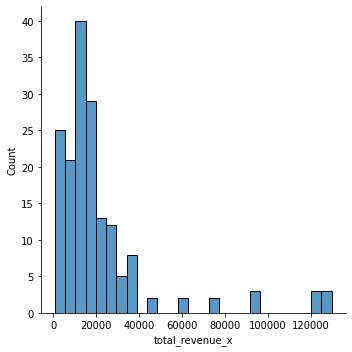

In [180]:
sns.displot(arppu_test_control1[arppu_test_control1['group_x_x']=='test'].total_revenue_x)

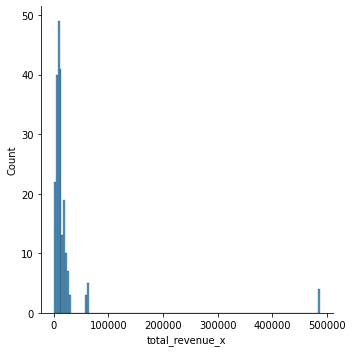

In [181]:
sns.displot(arppu_test_control1[arppu_test_control1['group_x_x']=='control1'].total_revenue_x)

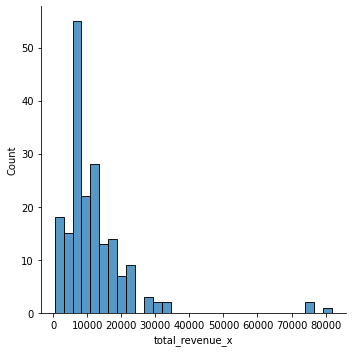

In [182]:
sns.displot(arppu_test_control2[arppu_test_control2['group_x_x']=='control2'].total_revenue_x)

In [183]:
#Также избавимся от выбросов, но позже вернемся к ним

In [184]:
high_quant_arppu=np.quantile(arppu_test_control1.total_revenue_x,0.99)

In [185]:
arppu_101=arppu_test_control1[(arppu_test_control1['total_revenue_x']<=high_quant_arppu)]

In [186]:
bootstrap_test(arppu_101[arppu_101['group_x_x']=='test'].total_revenue_x,arppu_101[arppu_101['group_x_x']=='control1'].total_revenue_x)

(8925.735175202157, 0.0)

In [187]:
#Наблюдаем стат.значимые различия, посмотрим в какую сторону

In [188]:
arppu_test=arppu_101[arppu_101['group_x_x']=='test'].total_revenue_x.sum()/arppu_101[arppu_101['group_x_x']=='test'].uid.count()

In [189]:
arppu_control1=arppu_101[arppu_101['group_x_x']=='control1'].total_revenue_x.sum()/arppu_101[arppu_101['group_x_x']=='control1'].uid.count()

In [190]:
((arppu_test-arppu_control1)/arppu_control1)*100

66.8234329655195

In [191]:
#Наша метрика выросла почти на 66%

In [192]:
#Вернем выбросы и проведем тест с ним

In [193]:
bootstrap_test(arppu_test_control1[arppu_test_control1['group_x_x']=='test'].total_revenue_x,arppu_test_control1[arppu_test_control1['group_x_x']=='control1'].total_revenue_x)

(166.97949735449947, 0.97593)

In [194]:
#Стат.значимых различий не наблюдаем

In [195]:
#Проработаем выборки test и control2

In [196]:
high_quant_arppu2=np.quantile(arppu_test_control2.total_revenue_x,0.99)

In [197]:
arppu_102=arppu_test_control2[(arppu_test_control2['total_revenue_x']<=high_quant_arppu2)]

In [198]:
bootstrap_test(arppu_102[arppu_102['group_x_x']=='test'].total_revenue_x,arppu_102[arppu_102['group_x_x']=='control2'].total_revenue_x)

(8567.721465968585, 0.0)

In [199]:
#Наблюдаем стат.значимые различия, посчитаем как изменилась наша метрика

In [200]:
arppu_test2=arppu_102[arppu_102['group_x_x']=='test'].total_revenue_x.sum()/arppu_102[arppu_102['group_x_x']=='test'].uid.count()
arppu_control2=arppu_102[arppu_102['group_x_x']=='control2'].total_revenue_x.sum()/arppu_102[arppu_102['group_x_x']=='control2'].uid.count()

In [201]:
((arppu_test2-arppu_control2)/arppu_control2)*100

72.86048342285608

In [202]:
#Наша метрика значительно выросла на 73%
#Проверим, что произойдет, если вернем выбросы

In [203]:
bootstrap_test(arppu_test_control2[arppu_test_control2['group_x_x']=='test'].total_revenue_x,arppu_test_control2[arppu_test_control2['group_x_x']=='control2'].total_revenue_x)

(10523.850037397158, 0.0)

In [204]:
#Также надлюдаем стат.значимые различия, проверим изменение метрики

In [205]:
arppu_test2_er=arppu_test_control2[arppu_test_control2['group_x_x']=='test'].total_revenue_x.sum()/arppu_test_control2[arppu_test_control2['group_x_x']=='test'].uid.count()
arppu_control2_er=arppu_test_control2[arppu_test_control2['group_x_x']=='control2'].total_revenue_x.sum()/arppu_test_control2[arppu_test_control2['group_x_x']=='control2'].uid.count()

In [206]:
((arppu_test2_er-arppu_control2_er)/arppu_control2_er)*100

89.49553323366762

In [207]:
#ARPPU выросла на 89%

In [208]:
#В рамках эксперимента сравнивались тестовая и две контрольные группы по ключевым метрикам:
#Conversion Rate (CR) (хи квадрат) ,(ARPPU) (пермутационный тест) и (ARPU) (пермутационный тест).
#Данные анализировались как с выбросами, так и без них.


In [209]:
#Результаты:
 #1. Conversion Rate
 #• Между тестовой и контрольной №1 — статистически значимых различий не выявлено.
 #• Между тестовой и контрольной №2 — статистически значимые различия: CR тестовой группы снизился на 33%.
 #2. ARPU
 #• Между тестовой и контрольной №1 — различия статистически незначимы, снижение на 21%, при добавление выбросов наличие различий
    # не выявлено.
 #• Между тестовой и контрольной №2 — статистически значимые различия не выявлено (без выбросов).
    #При включении выбросов значимость появляется, падение метрики примерно на 20%.
 #3. ARPPU
 #• Между тестовой и контрольной №1 — без выбросов статистически значимые различия, рост на 66%.
    #С выбросами различия незначимы.
 #• Между тестовой и контрольной №2 — без выбросов рост на 73%, с выбросами рост на 89%.

In [210]:
#Несмотря на рост ARPPU, эксперимент сопровождался значительным снижением CR и ARPU, что негативно сказывается на общей выручке.
#Введение изменений, протестированных в рамках данного A/B-теста, нецелесообразно.